In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load final processed dataset
df = pd.read_csv("../data/processed/bank_final.csv")

# Quick overview
df.head(5)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                11162 non-null  int64 
 1   job                11162 non-null  object
 2   marital            11162 non-null  object
 3   education          11162 non-null  object
 4   default            11162 non-null  int64 
 5   balance            11162 non-null  int64 
 6   housing            11162 non-null  int64 
 7   loan               11162 non-null  int64 
 8   contact            11162 non-null  object
 9   day                11162 non-null  int64 
 10  month              11162 non-null  object
 11  duration           11162 non-null  int64 
 12  campaign           11162 non-null  int64 
 13  pdays              11162 non-null  int64 
 14  previous           11162 non-null  int64 
 15  poutcome           11162 non-null  object
 16  deposit            11162 non-null  int64

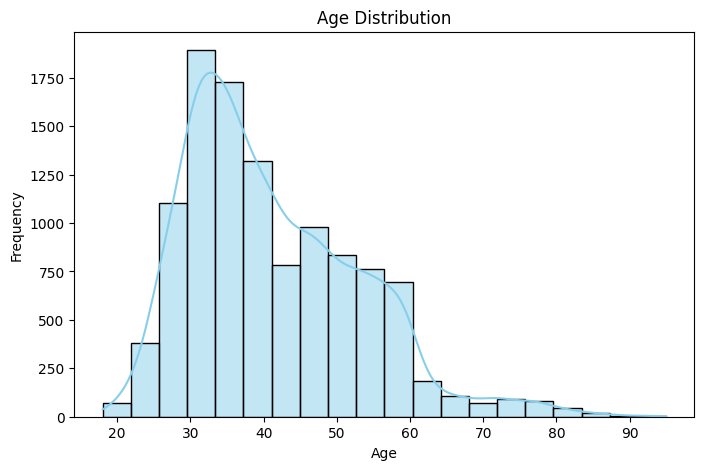

In [2]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


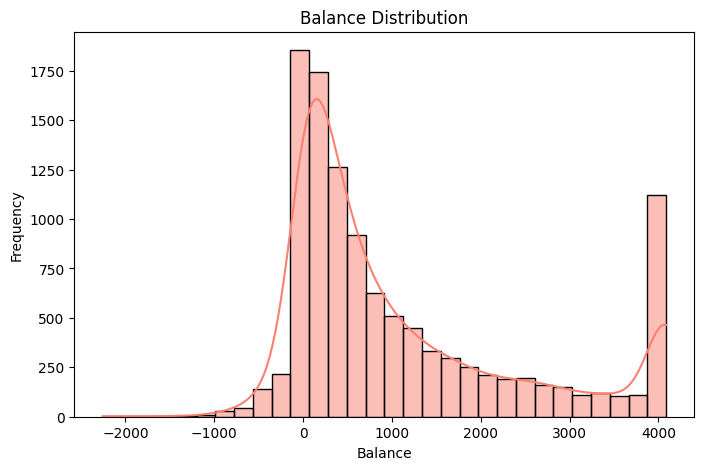

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df['balance'], bins=30, kde=True, color='salmon')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_192\1675147861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['job'], order=df['job'].value_counts().index, palette='viridis')


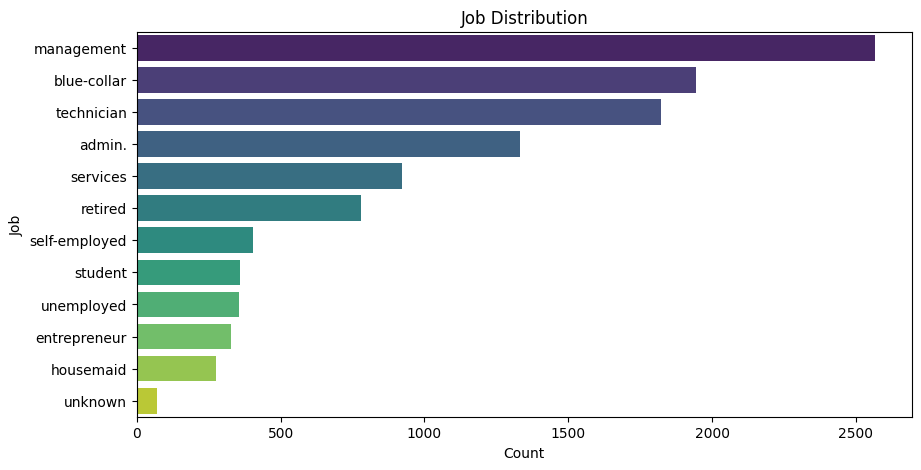

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['job'], order=df['job'].value_counts().index, palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_192\2540385426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['deposit'], palette='pastel')


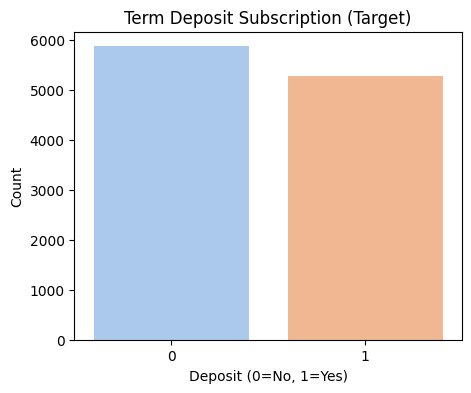

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['deposit'], palette='pastel')
plt.title('Term Deposit Subscription (Target)')
plt.xlabel('Deposit (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_192\1327364672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deposit', y='balance', data=df, palette='Set2')


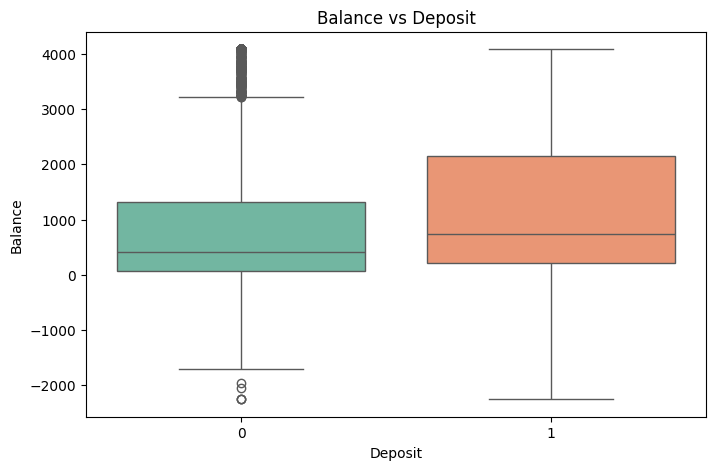

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x='deposit', y='balance', data=df, palette='Set2')
plt.title('Balance vs Deposit')
plt.xlabel('Deposit')
plt.ylabel('Balance')
plt.show()


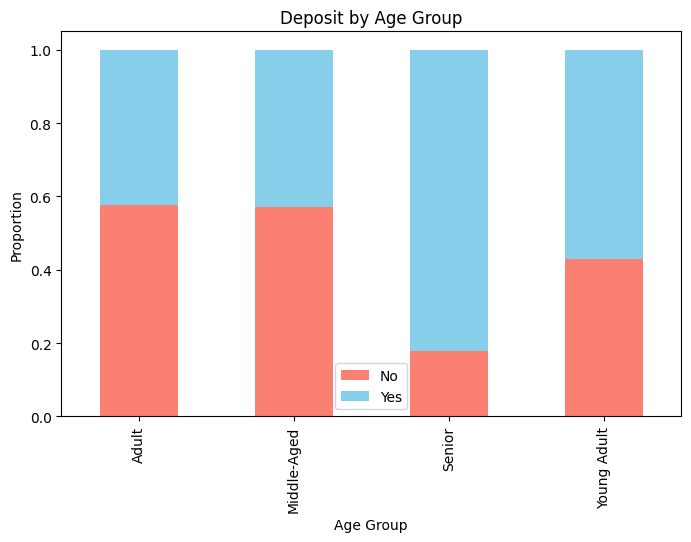

In [7]:
age_deposit = pd.crosstab(df['age_group'], df['deposit'], normalize='index')

age_deposit.plot(kind='bar', stacked=True, figsize=(8,5), color=['salmon','skyblue'])
plt.title('Deposit by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(['No','Yes'])
plt.show()


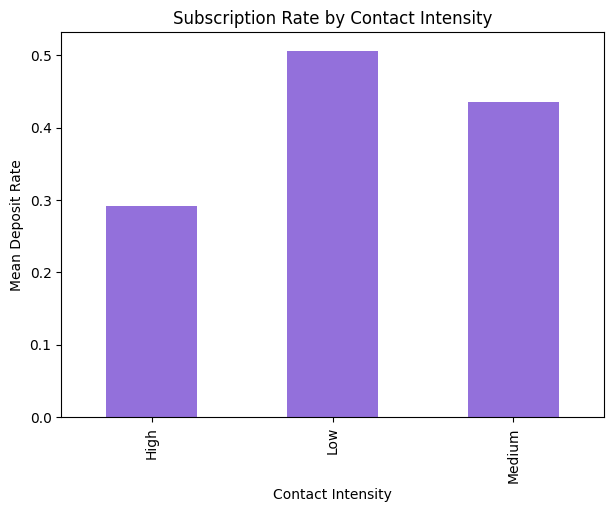

In [8]:
campaign_success = df.groupby('contact_intensity')['deposit'].mean()

campaign_success.plot(kind='bar', figsize=(7,5), color='mediumpurple')
plt.title('Subscription Rate by Contact Intensity')
plt.ylabel('Mean Deposit Rate')
plt.xlabel('Contact Intensity')
plt.show()


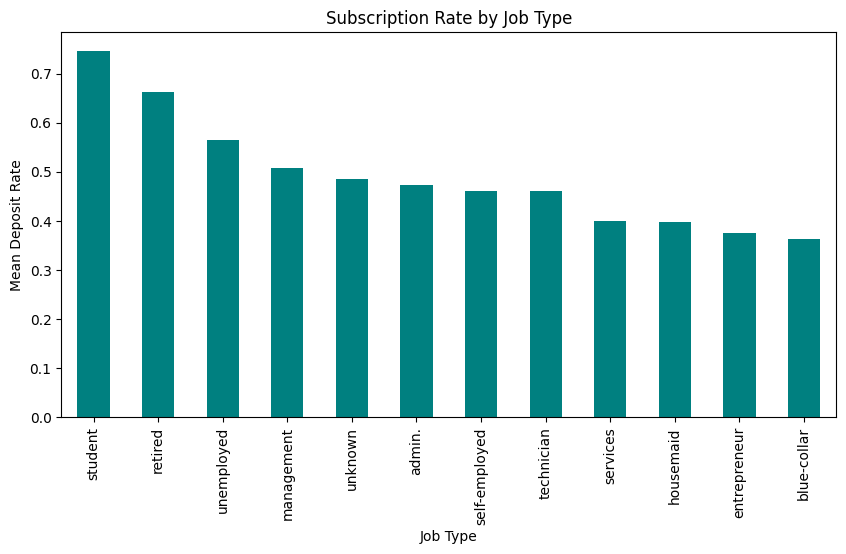

In [9]:
job_deposit = df.groupby('job')['deposit'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
job_deposit.plot(kind='bar', color='teal')
plt.title('Subscription Rate by Job Type')
plt.ylabel('Mean Deposit Rate')
plt.xlabel('Job Type')
plt.show()


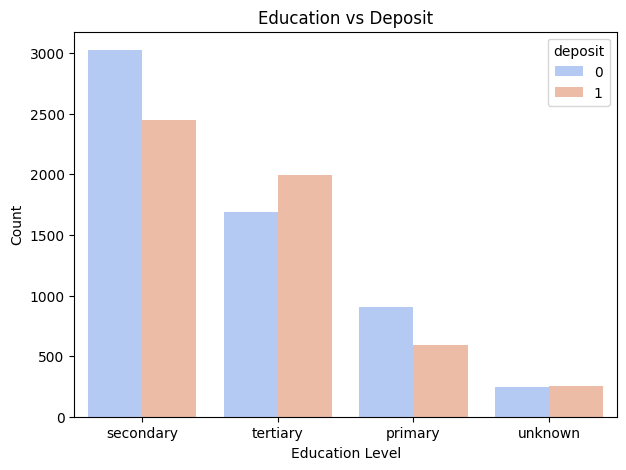

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x='education', hue='deposit', data=df, palette='coolwarm')
plt.title('Education vs Deposit')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


### Key Insights from EDA

1. **Age-based trends:** Adults (31–45) and Middle-Aged (46–60) have higher subscription rates compared to young adults or seniors.

2. **Balance effect:** Customers with higher account balances are more likely to subscribe, showing financial capacity matters.

3. **Contact intensity:** Medium campaign intensity (3–5 contacts) yields the best conversion rate; excessive contacts show diminishing returns.

4. **Job types:** Management, retired, and self-employed customers have higher subscription probabilities, indicating career and income stability influence subscriptions.

5. **Education influence:** Customers with tertiary education show higher subscription rates, suggesting education is a positive behavioral factor.

6. **Class imbalance:** Most customers do not subscribe, highlighting the need for careful model evaluation or resampling techniques later.
